In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/Amazon_text_data/1429_1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# New Section

In [ ]:
# shape of dataset
df.shape

(34660, 21)

The dataset has about 34,000+ rows, each containing review text, username, product name, rating, and other information for each product. Our objective is to use this data, explore it, and generate insights from it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Before jumping to the exploration stage, we need to perform basic data pre-processing steps like null value imputation and removal of unwanted data.

**Basic Text Preprocessing**

In [ ]:
''''But we only need information such as product name, review text, user recommendation(binary),
and the number of people that found a review helpful.
Therefore, I am dropping other columns and reducing the dataset to only four columns,
i.e., ‘name’, ‘reviews.text’, ‘reviews.doRecommend’, and ‘reviews.numHelpful’:'''
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [ ]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0
...,...,...,...,...
34655,NaN,This is not appreciably faster than any other ...,NaN,NaN
34656,NaN,Amazon should include this charger with the Ki...,NaN,NaN
34657,NaN,Love my Kindle Fire but I am really disappoint...,NaN,NaN
34658,NaN,I was surprised to find it did not come with a...,NaN,NaN


In [ ]:
df['name'].nunique()

48

In [ ]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

 I am only considering those products that have at least 500 reviews.
 I am doing this to make sure that I have a sufficient number of reviews for each product.

In [ ]:
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 8


In [ ]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0
...,...,...,...,...
26063,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","It has many uses. You can listen to music, che...",True,0.0
26064,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","Cost is not outrageous. Easy setup, fun to use...",True,0.0
26065,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",I knew about this from its crowd funding start...,True,1.0
26066,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",This is a neat product but did not fit my need...,False,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 26068 non-null  object 
 1   reviews.text         26068 non-null  object 
 2   reviews.doRecommend  26068 non-null  object 
 3   reviews.numHelpful   26068 non-null  float64
dtypes: float64(1), object(3)
memory usage: 814.8+ KB


In [ ]:
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 26068 non-null  object
 1   reviews.text         26068 non-null  object
 2   reviews.doRecommend  26068 non-null  int64 
 3   reviews.numHelpful   26068 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 814.8+ KB


In [ ]:
df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0


That was some Basic preprocessing. Now let us clean text Data.

**Cleaning Text Data**

Here, we have four columns in our dataset out of which two columns 
(‘name’, ‘reviews.text’) contain textual data. So, let’s start with the ‘name’ 
column first and take a look at the text present in this column:

In [ ]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

Some product names contain repeating names separated by three consecutive commas (,,,). So, let’s clean the name of the products:

In [ ]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])

In [ ]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

Now, it’s time to move on to the second column – reviews.text’. This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset:

In [ ]:
for index,text in enumerate(df['reviews.text'][30:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 If your looking for a affordable gift this is it!.
Review 2:
 This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.
Review 3:
 Works great. Love the portability of books. Overall great product
Review 4:
 I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.
Review 5:
 Just the right size for reading books and playing some games.
Review 6:
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 7:
 Overall a nice product for traveling purposes Value for money
Review 8:
 My children love this table great quality of pictures, excellent camera
Review 9:
 I bought 3 tablets and my family was not disappointed.
Review 10:
 Great tablet fast screen good size never gives me problem


Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

1.Expand contractions

2.Lowercase the reviews

3.Remove digits and words containing digits

4.Remove punctuations

Expand Contraction

Contractions are the shortened versions of words like don’t for do not and how’ll 
how will. These are used to reduce the speaking and writing time of words. We need
to expand these contractions for a better analysis of the reviews.


In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

Here, the expand_contractions function uses regular expressions to map the contractions in the text to their expanded forms from the dictionary. I will be using regular expressions a lot in the upcoming sections.

In [ ]:

df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x)) # this is removing all the integers


In [ ]:

df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x)) ### purpose ??

In [ ]:
for index,text in enumerate(df['cleaned'][30:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 if your looking for a affordable gift this is it
Review 2:
 this is a great tablet for the price would recommend it to anyone looking for a basic tablet
Review 3:
 works great love the portability of books overall great product
Review 4:
 i am still learning all the things i can do with my new kindle fire it is so much better lighter in weight and easier to use than my old tablet
Review 5:
 just the right size for reading books and playing some games
Review 6:
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 7:
 overall a nice product for traveling purposes value for money
Review 8:
 my children love this table great quality of pictures excellent camera
Review 9:
 i bought tablets and my family was not disappointed
Review 10:
 great tablet fast screen good size never gives me problem


**Preparing Text Data for EDA**

[https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
](http://)

We have already cleaned our data and have our corpus ready, but there are still some
steps left to be done before EDA. In this section, we’ll create a Document Term Matrix
that we’ll later use in our analysis. 
Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus.
we’ll do the following things:

Stopwords Removal

Lemmatization

Create Document Term Matrix

Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [ ]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...
Echo (White),compete ipad high end android tablet easily ou...


In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,...,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,...,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,...,0,4,0,0,0,0,2,0,2,0
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Echo (White),0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,3
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",1,0,0,0,0,2,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",0,0,0,1,1,11,1,1,0,1,...,0,5,0,0,0,1,2,1,5,0
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


**Exploratory Data Analysis on Amazon Product Reviews using Python**

let’s start by looking at the common words present in the reviews for each product.
For this, I will use the document term matrix created earlier with word clouds for
plotting these words. Word clouds are the visual representations of the frequency of 
different words present in a document. It gives importance to the more frequent words
which are bigger in size compared to other less frequent words.

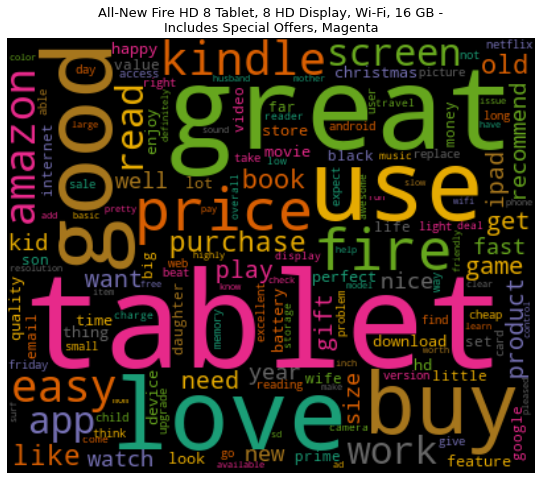

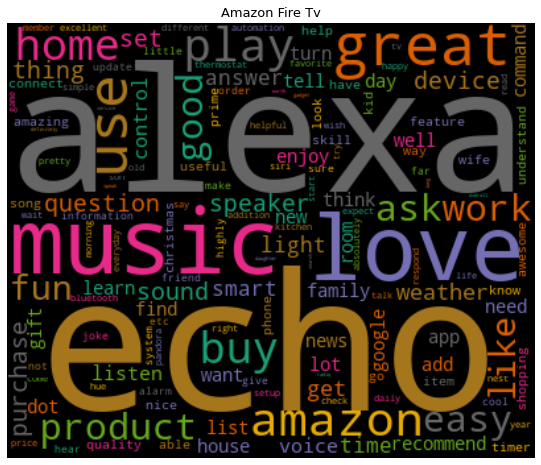

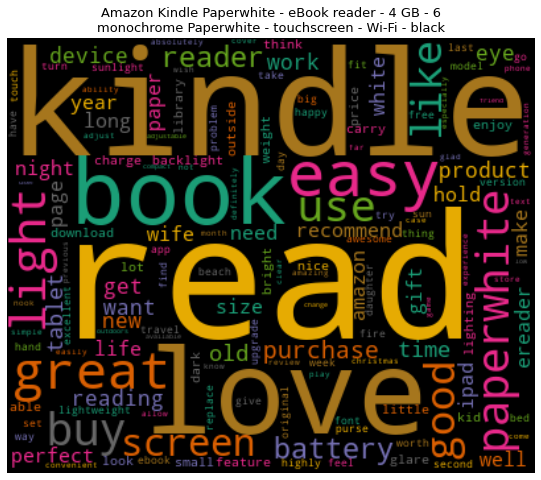

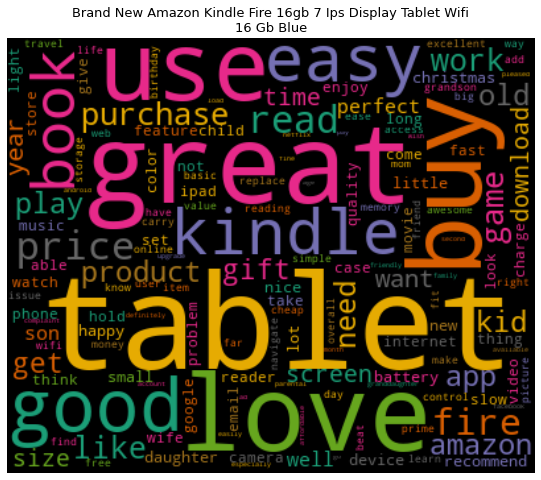

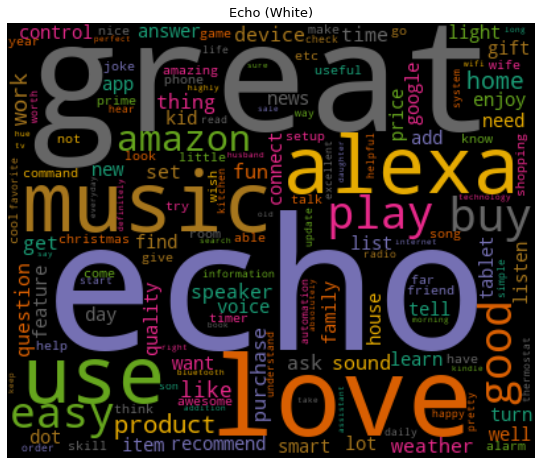

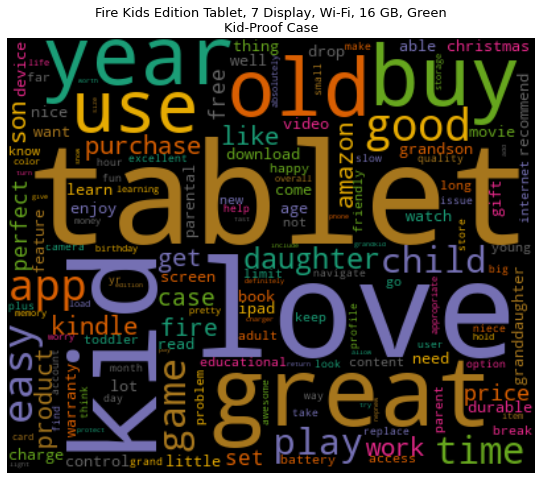

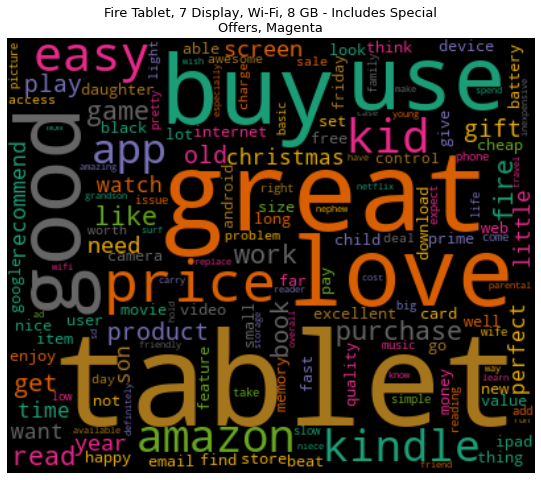

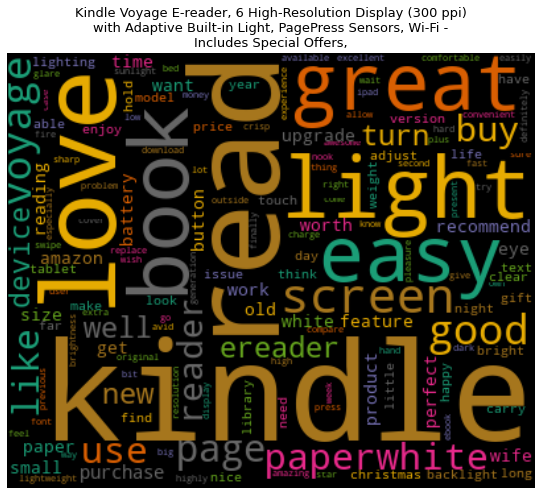

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Here, we can see that LOVE, USE, BUY, GREAT, and EASY are the most frequently
occurring words for almost every product. This means that users are loving products
from Amazonand found purchasing them a great decision. They also found them easy to use.

Now, let’s say Amazon wants to dig deeper into this and wants to know which products
they should improve. We can find the answer to this question by doing a sentiment
analysis of the reviews for each product. Sentiment analysis is the analysis of how
much a piece of text is positive and opinionated.

In [ ]:

from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 it did not work I had to return it after Christmas and buy something else, made for a wonderful Christmas mourning
Review 2:
 Perfect for face timing with family. Perfect for travel.
Review 3:
 Excellent product.Relable.Maximum speed.Fast downloading


In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 2:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 3:
 Was looking the a base tablet for reading and videos on the go. This more than what I was expecting at this price point.


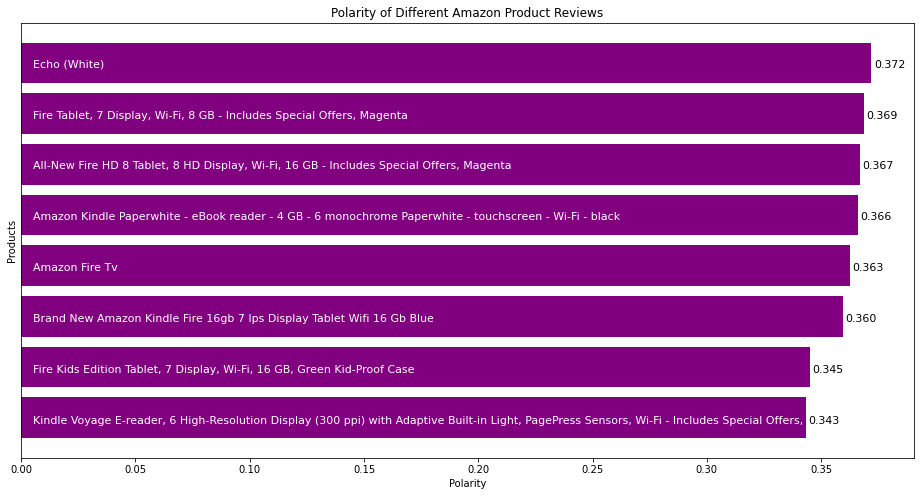

In [ ]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

You can see that according to the polarity of reviews,
Amazon needs to improve Fire Kids Edition Tablet and Kindle Voyage E-reader.
Let’s also take a look at the number of reviewers who recommended a particular product.
For this, we can take the percentage of reviewers and plot that:

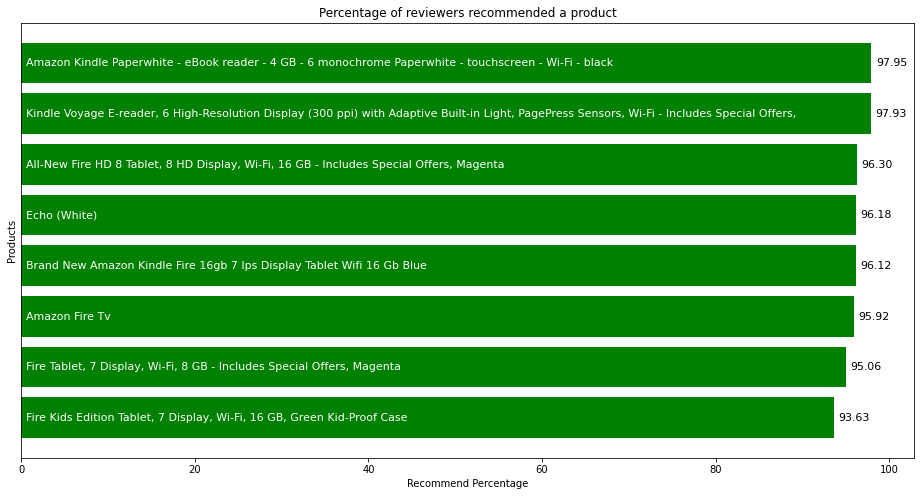

In [ ]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

Here, we can see that the Fire Kids Edition Tablet has the lowest recommendation 
percentage. It’s reviews also have the lowest polarity. So, we can say that the polarity
of reviews affects the chances of a product getting recommended.
Another thing that we can look at is the readability of reviews upvoted as 
helpful by others. The readability of a text document can be checked using various
readability indices like Flesch Reading Ease, Dale Chall Readability Score, and 
Gunning Fog Index.

For this, we can use the textstat library in Python.

In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 31.4 MB/s 


In [ ]:
import textstat
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvoted reviews=> 7.626270325203252
Dale Chall Score of not upvoted reviews=> 7.45709535959177
Flesch Reading Score of upvoted reviews=> 84.24337398373983
Flesch Reading Score of not upvoted reviews=> 86.09757175889013
Gunning Fog Index of upvoted reviews=> 7.214654471544715
Gunning Fog Index of not upvoted reviews=> 6.505090894594164


There is very little difference in the Dale Chall Score and the Flesch Reading Score for helpful and not helpful reviews. But there is a considerable amount of variation in the Gunning Fog Index.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the text_standard() function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely.

In [ ]:
df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


Interesting. Both upvoted and not upvoted reviews are easily understandable by anyone who has completed the 5th or 6th grade in school.

Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the reading_time() function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [ ]:
df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews=> 3.4542174796747966
Reading Time of not upvoted reviews=> 1.7917397544251314


**What’s the Conclusion from the EDA on Text Data?**

Let’s take a look at the inferences drawn from the above analysis:

Customers love products from Amazon. They find them a great purchase and easy to use

Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product

The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school

The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful

In [ ]:
9+9

18